In [45]:
import numpy as np
from matplotlib import pyplot as plt

In [46]:
pop_size = 1000
epochs = 100
collect_payoff = 50
handover_payoff = 50
delivery_payoff = 50

In [58]:
def minigame(p1_move, p2_move):
    global p1_payoffs
    global p2_payoffs
    p2_costs = {0:2.3, 1:1.3, 2:0.77, 3:0.6, 4:0.77, 5:1.3, 6:2.3}
    if p1_move == p2_move:
        p1_payoffs[p1_move] += (collect_payoff + handover_payoff - (2.3 + (6 - p1_move)**2))
        p2_payoffs[p2_move] += (handover_payoff + delivery_payoff - (p2_costs[p2_move] + p2_move)**2)
    else:
        p1_payoffs[p1_move] += (collect_payoff - (2.3 + (6 - p1_move)**2))
        p2_payoffs[p2_move] += (-(p2_costs[p2_move] + p2_move)**2)

In [59]:
def round():
    global p1_agents
    global p2_agents
    global p1_payoffs
    global p2_payoffs
    np.random.shuffle(p1_agents)
    np.random.shuffle(p2_agents)
    pairs = np.transpose(np.vstack((p1_agents, p2_agents))) #pair off into games
    [minigame(*p) for p in pairs] #execute game on each pair
    p1_proportions  = p1_payoffs + np.abs(np.min(p1_payoffs))
    p2_proportions = p2_payoffs + np.abs(np.min(p2_payoffs))
    p1_proportions = p1_proportions/np.sum(p1_proportions)
    p2_proportions = p2_proportions/np.sum(p2_proportions) #scale p1 and p2 proportions
    new_p1_agents = [np.random.choice(list(range(7)), p = p1_proportions) for i in range(pop_size)]
    new_p2_agents = [np.random.choice(list(range(7)), p = p2_proportions) for i in range(pop_size)] #declare new agents
    p1_agents = new_p1_agents
    p2_agents = new_p2_agents
    return p1_proportions, p2_proportions



In [60]:
def run():
    global p1_agents
    global p2_agents
    global p1_payoffs
    global p2_payoffs
    p1_history = {0:[1/7], 1:[1/7], 2:[1/7], 3:[1/7], 4:[1/7], 5:[1/7], 6:[1/7]}
    p2_history = {0:[1/7], 1:[1/7], 2:[1/7], 3:[1/7], 4:[1/7], 5:[1/7], 6:[1/7]}
    p1_agents = np.array([np.random.randint(0, 7) for i in range(pop_size)])
    p2_agents = np.array([np.random.randint(0, 7) for i in range(pop_size)]) #set up initial population
    for epoch in range(epochs):
        p1_payoffs = np.zeros(7) #zero payoffs before each round
        p2_payoffs = np.zeros(7)
        p1_props, p2_props = round()
        for i in range(7):
            p1_history[i].append(p1_props[i]) #append proportions to log
            p2_history[i].append(p2_props[i])
    print(f"Final proportions: \n P1: {p1_props} \n P2: {p2_props}")
    visualise(p1_history, p2_history)
    
def visualise(p1_history, p2_history):
        fig, ax = plt.subplots(1,2)
        x = np.linspace(0,epochs+1, epochs+1)
        for i in range(7):
            ln = ax[0].plot(x, p1_history[i], label=f"Proportion of {i}")
        for i in range(7):
            ln2 = ax[1].plot(x, p2_history[i], label=f"Proportion of {i}")
        ax[0].legend()
        ax[1].legend()
        plt.show()

Final proportions: 
 P1: [0. 0. 0. 0. 1. 0. 0.] 
 P2: [0. 0. 0. 0. 1. 0. 0.]


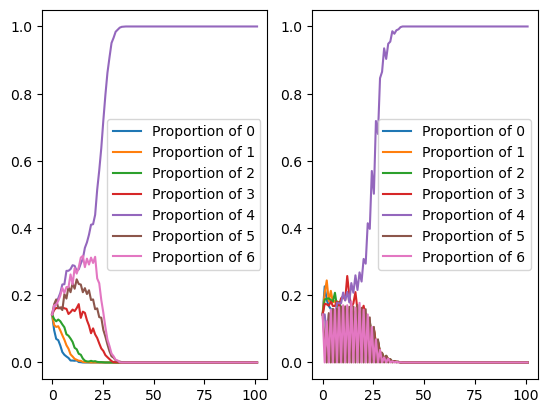

In [61]:
run()